<a href="https://colab.research.google.com/github/Akshay-368/Bank_Customers_Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



In [74]:
df = pd.read_csv("/content/bank_transactions.csv")
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [75]:
'''
import gzip
import shutil
import pandas as pd

# Path to the compressed .gz file in Colab
compressed_file = "/content/bank_ransactions.parquet.gz"

# Path to save the decompressed Parquet file
decompressed_file = "/content/bank_transactions.parquet"

# Decompress the .gz file
with gzip.open(compressed_file, "rb") as f_in:
    with open(decompressed_file, "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

print("File successfully decompressed!")

# Now read the decompressed Parquet file
df = pd.read_parquet(decompressed_file)
print(df.head())

'''


'\nimport gzip\nimport shutil\nimport pandas as pd\n\n# Path to the compressed .gz file in Colab\ncompressed_file = "/content/bank_ransactions.parquet.gz"\n\n# Path to save the decompressed Parquet file\ndecompressed_file = "/content/bank_transactions.parquet"\n\n# Decompress the .gz file\nwith gzip.open(compressed_file, "rb") as f_in:\n    with open(decompressed_file, "wb") as f_out:\n        shutil.copyfileobj(f_in, f_out)\n\nprint("File successfully decompressed!")\n\n# Now read the decompressed Parquet file\ndf = pd.read_parquet(decompressed_file)\nprint(df.head())\n\n'

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [77]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [78]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [79]:
df = df.drop(columns=['TransactionDate', 'TransactionTime' , 'CustomerDOB', 'CustLocation', 'CustGender'])
# Convert non-numerical features to numerical using one-hot encoding
#df = pd.get_dummies(df, columns=[])

CustAccountBalance         60.530334
TransactionAmount (INR)    47.337252
dtype: float64


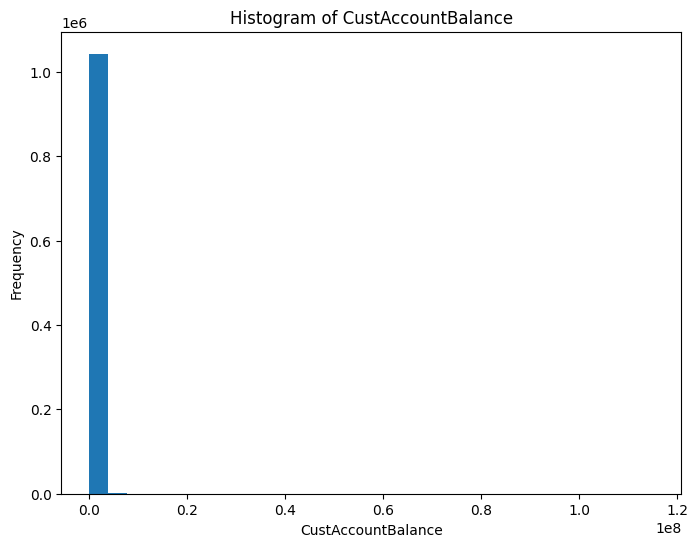

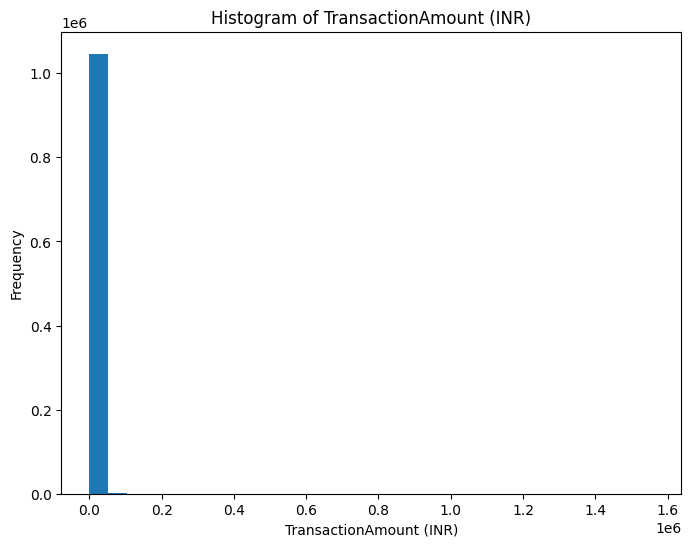

Using median for imputation of CustAccountBalance
Using median for imputation of TransactionAmount (INR)


In [80]:

# Calculate skewness for numerical features
numerical_features = df.select_dtypes(include=np.number).columns
skewness = df[numerical_features].skew()

# Print skewness
print(skewness)

# Plot histograms for numerical features
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col].dropna(), bins=30)  # Handle potential NaN values
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Example of imputation based on skewness
for col in numerical_features:
    if abs(skewness[col]) > 0.5:  # Adjust threshold as needed
        # Highly skewed, use median imputation
        print(f"Using median for imputation of {col}")
        df[col] = df[col].fillna(df[col].median())
    else:
        # Less skewed, use mean imputation
        print(f"Using mean for imputation of {col}")
        df[col] = df[col].fillna(df[col].mean())

In [81]:
df.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustAccountBalance,0
TransactionAmount (INR),0


In [82]:
df.head()

,TransactionID,CustomerID,CustAccountBalance,TransactionAmount (INR)
0,T1,C5841053,17819.05,25.0
1,T2,C2142763,2270.69,27999.0
2,T3,C4417068,17874.44,459.0
3,T4,C5342380,866503.21,2060.0
4,T5,C9031234,6714.43,1762.5


In [83]:
# Feature scaling
scaler = StandardScaler()

# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=np.number).columns
scaled_features = scaler.fit_transform(df[numerical_features])

In [84]:
# Apply PCA for dimensionality reduction (optional, but often helpful)
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
principal_components = pca.fit_transform(scaled_features)

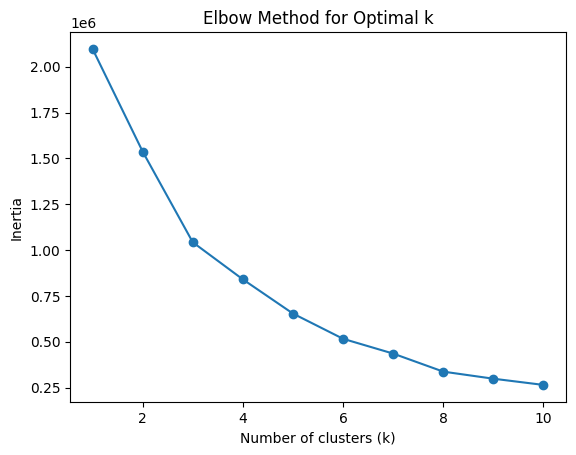

In [85]:
# Determine optimal number of clusters (e.g., using the Elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [86]:
# Apply KMeans clustering with the chosen number of clusters
optimal_k = 3 # Replace with your optimal k from the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(principal_components)

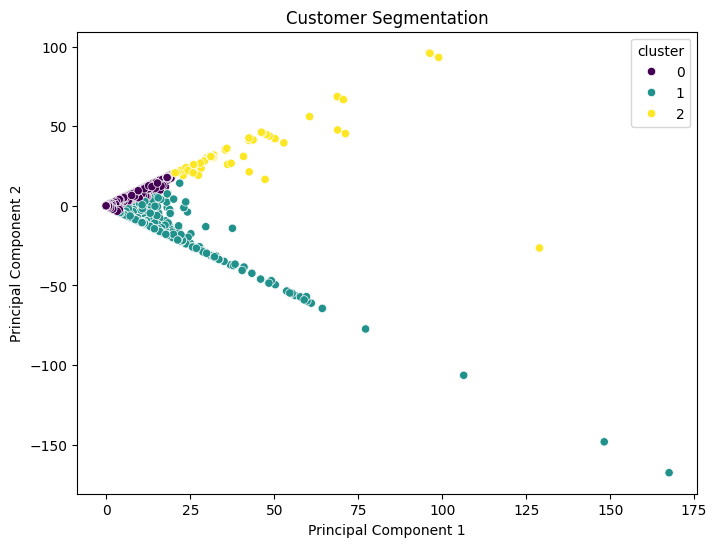

In [87]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=df['cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [88]:

# Analyze cluster characteristics
for i in range(optimal_k):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i].describe())

Cluster 0:
       CustAccountBalance  TransactionAmount (INR)    cluster
count        1.043992e+06             1.043992e+06  1043992.0
mean         1.056496e+05             1.279564e+03        0.0
std          4.875115e+05             2.830936e+03        0.0
min          0.000000e+00             0.000000e+00        0.0
25%          4.717010e+03             1.600000e+02        0.0
50%          1.677505e+04             4.538000e+02        0.0
75%          5.678802e+04             1.190000e+03        0.0
max          2.396086e+07             3.625000e+04        0.0
Cluster 1:
       CustAccountBalance  TransactionAmount (INR)  cluster
count        4.402000e+03             4.402000e+03   4402.0
mean         4.858465e+05             7.105836e+04      1.0
std          1.324508e+06             5.842025e+04      0.0
min          0.000000e+00             3.380000e+04      1.0
25%          2.882956e+04             4.454775e+04      1.0
50%          1.165122e+05             5.349750e+04      1.0


Cluster Interpretations

Cluster 0 :

Size: 1,043,992 data points (the largest cluster).

Characteristics:

Low average account balance (mean = 1.056496e+05 INR, ~105,649.6 INR).

Low average transaction amount (mean = 1.279564e+03 INR, ~1,279.56 INR).

High standard deviation for account balance, indicating a wide range of balances.

Most transactions are small (median transaction amount is ~453.8 INR).

Interpretation: This cluster  represents customers with relatively low account balances and small transaction amounts, possibly retail or low-income customers.

Cluster 1

Size: 4,402 data points.

Characteristics:

Moderate average account balance (mean = 4.858465e+05 INR, ~485,846.5 INR).

High average transaction amount (mean = 7.105836e+04 INR, ~71,058.36 INR).

Transactions are significantly larger than Cluster 0 (minimum transaction amount is ~33,800 INR).

Interpretation: This cluster represents customers with moderate account balances and larger transaction amounts, possibly small businesses or mid-tier customers.

Cluster 2

Size: 173 data points (the smallest cluster).

Characteristics:

Very high average account balance (mean = 4.820054e+07 INR, ~48,200,540 INR).

Moderate average transaction amount (mean = 12386.053815 INR, ~12,386.05 INR).

Extremely high maximum account balance (max = 1.150355e+08 INR, ~115,035,500 INR).

High standard deviation for transaction amounts, indicating variability.

Interpretation: This cluster represents high-net-worth individuals or large businesses with very high account balances and moderate to large transaction amounts.

Checking Model Performance
1. Silhouette Score
To assess clustering quality:

In [89]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(principal_components, kmeans.labels_)
print("Davies-Bouldin Index:", dbi)


Davies-Bouldin Index: 0.47231531669716476


Score of 0.4723 is excellent for real-world clustering tasks, especially when working with customer segmentation. It shows that the clusters are reasonably well-defined and separated.

2. Explained Variance (PCA)

To evaluate how much information is retained:

In [90]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")


Explained Variance Ratio: [0.53124218 0.46875782]


3. Within-Cluster Sum of Squares (Inertia)

Already plotted using the Elbow method, but include the final inertia:

In [91]:
print(f"Final Inertia: {kmeans.inertia_}")


Final Inertia: 1042428.522008701
